# Importing Data and Modules

In [4]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [5]:
PATH_DATA = "../data/"

accounts_data = pd.read_csv(PATH_DATA + "instagram_accounts.csv", converters={'id_followers': literal_eval})


In [6]:
# dict_following = {key: 0 for key in accounts_data["id_user"]}
# for idx in range(len(accounts_data)):
#     lst = accounts_data.at[idx, "id_followers"]
#     for ele in lst:
#        dict_following[ele] += 1



# Cleaning up Accounts Data: 

We need to remove users with duplicate IDs. This entails removing them from the followers lists, and recalculating the number of followers for each.

In [7]:
# Checking for duplicates - and we found one!
print(accounts_data.shape)
duplicated_user_id = accounts_data[ accounts_data['id_user'].duplicated() == True ]["id_user"].values
print(duplicated_user_id)
accounts_data.drop_duplicates(subset=['id_user'], inplace=True, keep=False)
accounts_data.reset_index(drop=True, inplace=True)
accounts_data.drop(columns=["Unnamed: 0"], inplace=True)
print(accounts_data.head())

for idx in range(len(accounts_data)):
    lst = accounts_data.at[idx, "id_followers"]
    for ele in duplicated_user_id:
        if ele in lst:
            lst.remove(ele)
    accounts_data.at[idx, "id_followers"] = lst

accounts_data["nb_followers"] = accounts_data["id_followers"].apply(len)


(3047, 11)
[603282]
   id_user  nb_followers  nb_following  nb_posts     sex  \
0   288877           167            58        48  female   
1   140311            67            72         8  female   
2   182096           142            95        14  female   
3   208875           249            99       150    male   
4   960092            96           114        19  female   

                                        id_followers  \
0  [738818, 134147, 314454, 977416, 926730, 82740...   
1  [380289, 341188, 775558, 998151, 246792, 17869...   
2  [524806, 968200, 241324, 233490, 188948, 15054...   
3  [776192, 164353, 989698, 134147, 305670, 65792...   
4  [858624, 896013, 138779, 817185, 854563, 88580...   

                       department                   email  \
0  ('64', 'Pyrénées-Atlantiques')  zacharieweber@live.com   
1                ('03', 'Allier')   hugues65@fontaine.com   
2                  ('27', 'Eure')       gilles11@live.com   
3         ('22', "Côtes-d'Armor")    m

In [8]:
print(accounts_data.head())
print(accounts_data.info())
# print(posts_data.head())
# print(posts_data.info())

   id_user  nb_followers  nb_following  nb_posts     sex  \
0   288877           167            58        48  female   
1   140311            67            72         8  female   
2   182096           142            95        14  female   
3   208875           249            99       150    male   
4   960092            95           114        19  female   

                                        id_followers  \
0  [738818, 134147, 314454, 977416, 926730, 82740...   
1  [380289, 341188, 775558, 998151, 246792, 17869...   
2  [524806, 968200, 241324, 233490, 188948, 15054...   
3  [776192, 164353, 989698, 134147, 305670, 65792...   
4  [858624, 896013, 138779, 817185, 854563, 88580...   

                       department                   email  \
0  ('64', 'Pyrénées-Atlantiques')  zacharieweber@live.com   
1                ('03', 'Allier')   hugues65@fontaine.com   
2                  ('27', 'Eure')       gilles11@live.com   
3         ('22', "Côtes-d'Armor")    manoncolin@gmail.com 

# Data Analysis
Here, we look at characteristics of our data to understand the composition of our users.

In [9]:
## Sex Data
accounts_data['sex'].value_counts()

female    1550
male      1495
Name: sex, dtype: int64

In [10]:
accounts_data['department'].value_counts().sort_values(ascending=False)

('55', 'Meuse')                      44
('972', 'Martinique')                42
('85', 'Vendée')                     40
('31', 'Haute-Garonne')              39
('27', 'Eure')                       39
                                     ..
('52', 'Haute-Marne')                21
('2A', 'Corse-du-Sud')               20
('36', 'Indre')                      20
('02', 'Aisne')                      19
('04', 'Alpes-de-Haute-Provence')    18
Name: department, Length: 101, dtype: int64

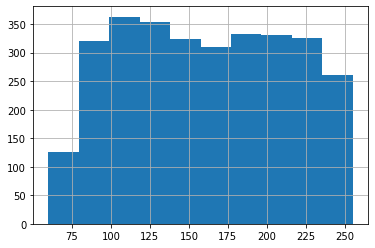

count    3045.000000
mean      160.211166
std        51.991272
min        60.000000
25%       115.000000
50%       159.000000
75%       205.000000
max       255.000000
Name: nb_followers, dtype: float64

In [11]:
accounts_data["nb_followers"].hist()
plt.show()
accounts_data["nb_followers"].describe()

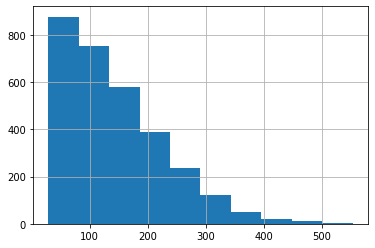

count    3045.000000
mean      142.526437
std        86.629566
min        29.000000
25%        75.000000
50%       125.000000
75%       192.000000
max       553.000000
Name: nb_following, dtype: float64

In [12]:
accounts_data["nb_following"].hist()
plt.show()
accounts_data["nb_following"].describe()

count    3045.000000
mean       38.923810
std        12.513965
min        18.000000
25%        28.000000
50%        39.000000
75%        50.000000
max        60.000000
Name: age, dtype: float64


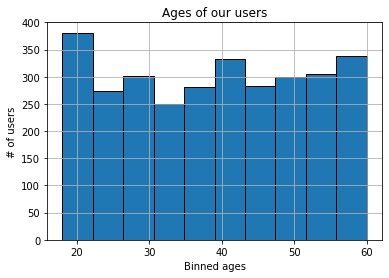

In [13]:
age = pd.to_datetime(accounts_data["birth_date"])
age = (pd.to_datetime("today") - age) / np.timedelta64(1, "Y")
age[age < 0] += 100

accounts_data["age"] = age.astype('int32')
print(accounts_data["age"].describe())

accounts_data["age"].hist(histtype="bar", ec="black")
plt.title("Ages of our users")
plt.ylabel("# of users")
plt.xlabel("Binned ages")
plt.show()

In [14]:
# Checking for empty cells across the data 
accounts_data.isnull().values.any()


False